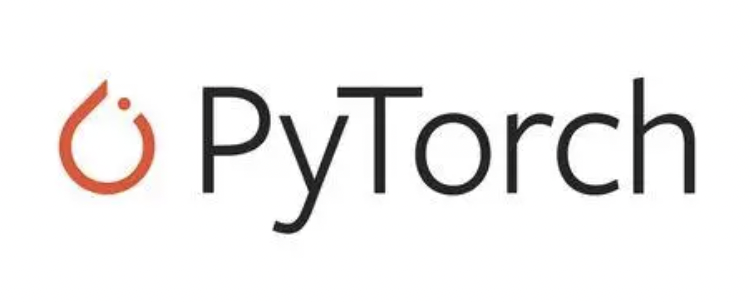

## 2.1 建模的一般步骤

步骤1:设计模型（design a model,input, output size, forward pass） <br/>步骤2:确立损失函数与优化函数(construct loss and optimizer) <br/>步骤3:训练(training loop) 前向：计算预测与损失（compute prediction and loss） 反向：梯度(gradients) 更新权重(upgrade weights)

#### 例1:简单线性回归

### Approximation:

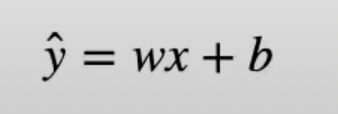

### Cost function:

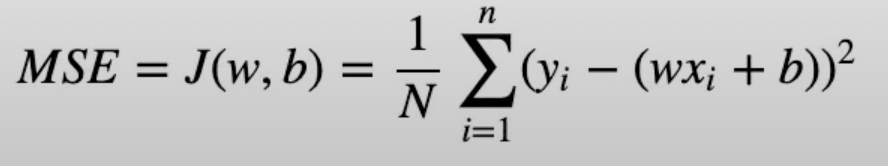

<div>
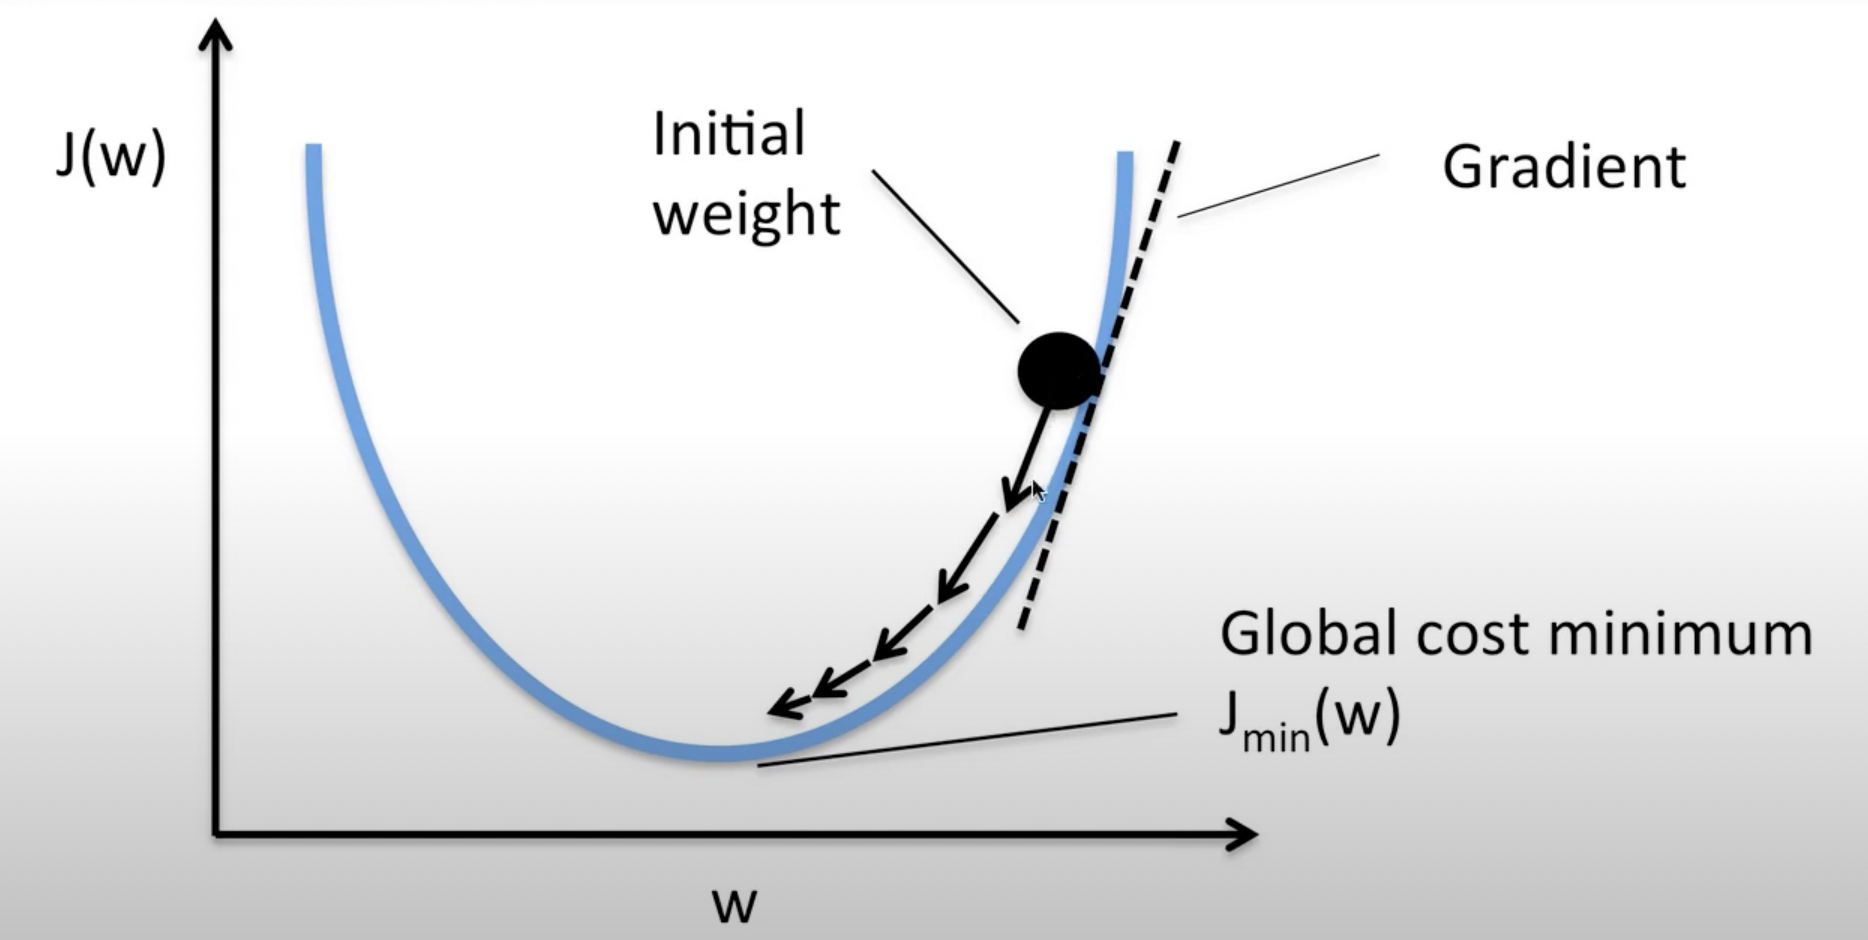
</div>

### update rules

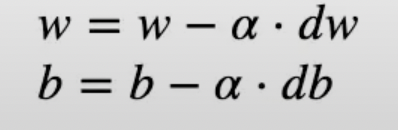

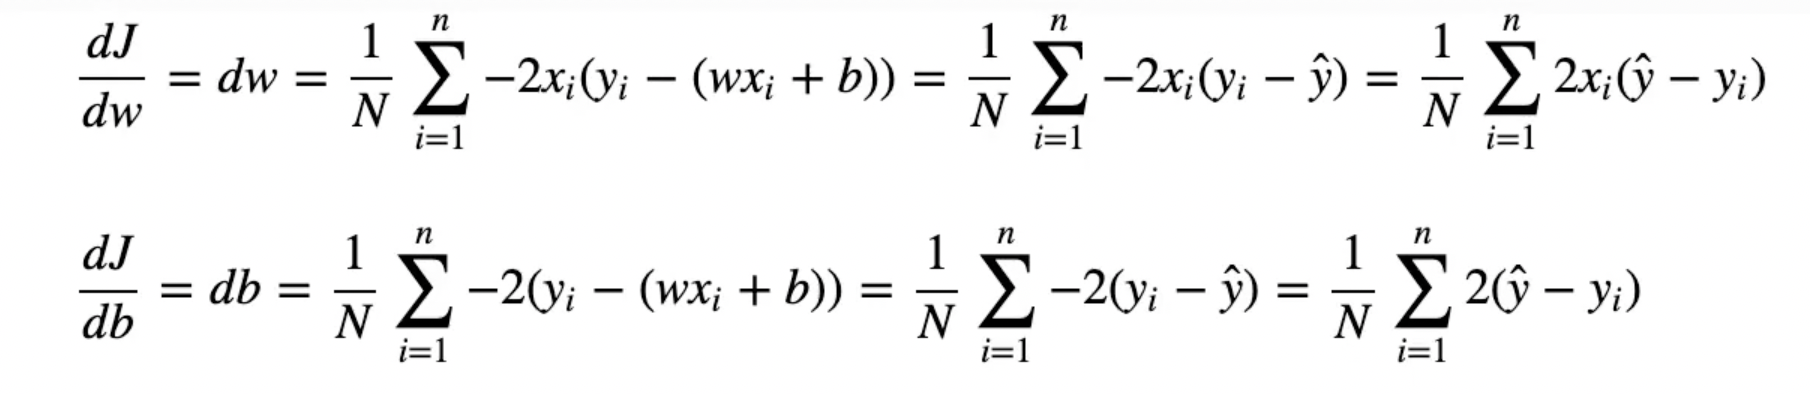

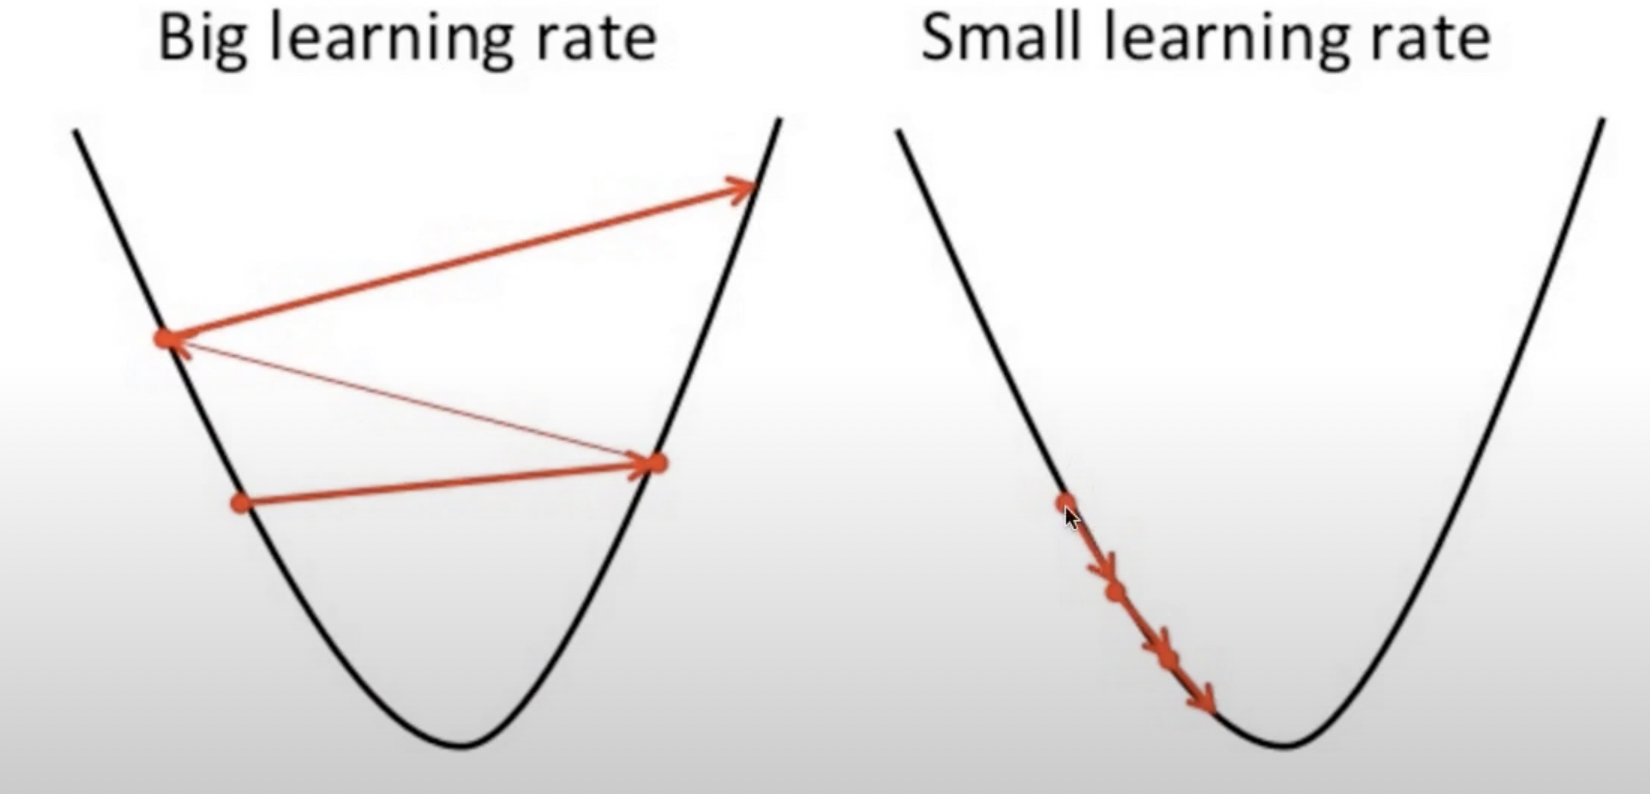

In [ ]:
from sympy import diff,Symbol
from sympy.abc import n, w,b
xi=Symbol("xi")
yi=Symbol("yi")
expressr=(yi-(w*xi+b))**2
expressw=diff(expressr,w)
expressb=diff(expressr,b)
print(expressw)
print(expressb)

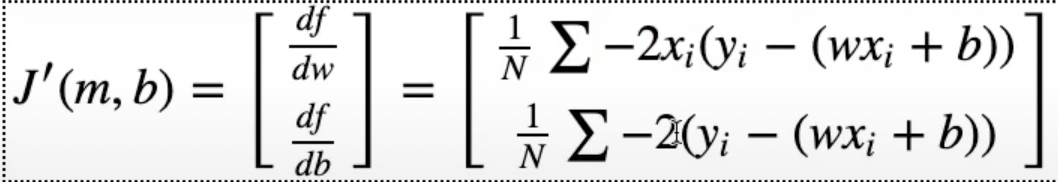

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [ ]:
#1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#3) Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

In [ ]:
predicted = model(X).detach().numpy()##必须有detach（），变量不再需要梯度

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [ ]:
print(X.shape)

In [ ]:
print(model)

In [ ]:
import hiddenlayer as h
vis_graph = h.build_graph(model, torch.zeros([100,1]))   # 获取绘制图像的对象
vis_graph.theme = h.graph.THEMES["blue"].copy()     # 指定主题颜色
vis_graph.save("./first_h.png") 

In [ ]:
from torchviz import make_dot
# x = torch.randn(1, 3, 227, 227)
y = model(X)
vise=make_dot(y, params=dict(model.named_parameters()))
vise.view()

例2:鸢尾花分类

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.autograd import Variable
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

iris=sns.load_dataset('iris')#DataFrame格式
X_iris=iris.drop('species',axis=1)
y_iris=iris['species']
print('y_iris.shape:',y_iris.shape)
label=LabelEncoder()#必须先把y_iris中的类别文字修改为数字
y_iris=label.fit_transform(y_iris)
print('X_iris.shape:',X_iris)
print('y_irislabel.shape:',y_iris.shape)
Xtrain,Xtest,ytrain,ytest=train_test_split(X_iris,y_iris,random_state=1)
print(type(Xtrain))

Xtrain=np.array(Xtrain)
ytrain=np.array(ytrain)
Xtrain = torch.tensor(Xtrain)
ytrain =torch.tensor(ytrain)
Xtrain= Variable(Xtrain).float()
ytrain=Variable(ytrain).long()
Xtest=np.array(Xtest)
ytest=np.array(ytest)
Xtest = torch.tensor(Xtest)
ytest =torch.tensor(ytest)
Xtest= Variable(Xtest).float()
ytest=Variable(ytest).long()

print(Xtrain.shape)
print(ytrain)

In [ ]:
class NetModel(nn.Module):
    def __init__(self, input_dim):
        super(NetModel, self).__init__()
        self.layer1 = nn.Linear(input_dim,50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x),dim=1) # To check with the loss function
        return x
    
net_iris= NetModel(Xtrain.shape[1])
optimizer = torch.optim.Adam(net_iris.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 120

def print_(loss):
    print ("The loss calculated: ", loss)

for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    y_pred = net_iris(Xtrain)
    loss = loss_fn(y_pred, ytrain)
    print_(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

    

In [ ]:
torch.save(net_iris, 'net_iris.pkl')  # save entire net
#torch.save(net.state_dict(), 'net_params.pkl')   # save only the parameters
net_iris = torch.load('net_iris.pkl')  #加载神经网络b
y_pred=net_iris(Xtest)
print(y_pred.shape)

In [ ]:
print(ytest.shape)

In [ ]:
y_pred=y_pred.detach().numpy()#去掉反向传播，成为彻底的numpy数据类型
print ("The accuracy is", accuracy_score(ytest, np.argmax(y_pred, axis=1)))

In [ ]:
print(net_iris)

In [ ]:
from torchviz import make_dot
# x = torch.randn(1, 3, 227, 227)
ytest = net_iris(Xtest)
vise=make_dot(ytest, params=dict(net_iris.named_parameters()))
vise.view()

## 2.2 基础

安装:https://pytorch.org/get-started/locally/

Tensors 类似于 NumPy 的 ndarrays ，同时 Tensors 可以使用 GPU 进行计算。

### 2.1.1数据类型

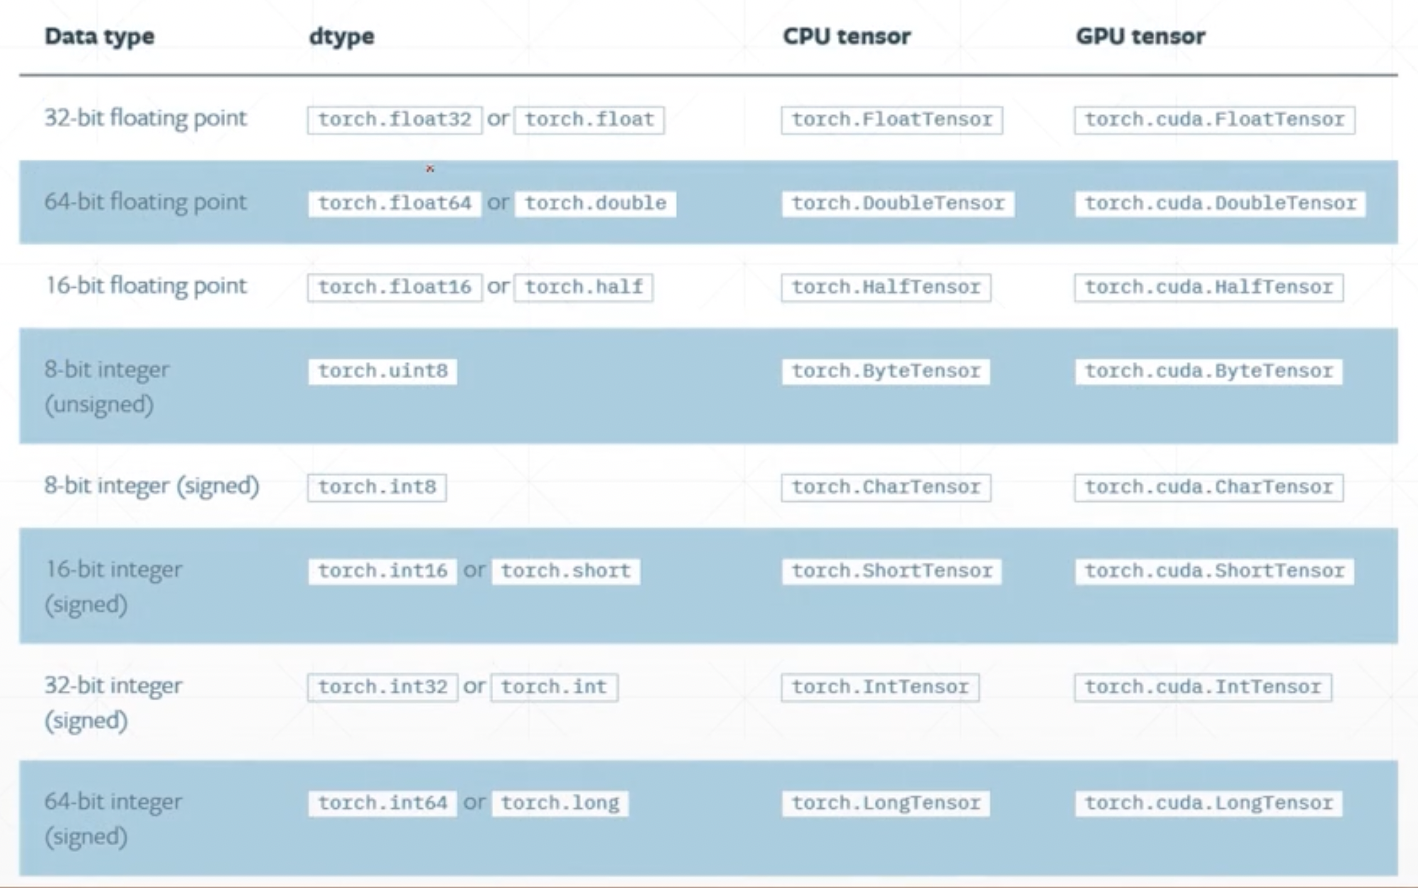

In [ ]:
import torch
print(torch.__version__)

In [ ]:
import torch
x1= torch.rand(5, 3)
print(x1)

In [ ]:
print(x1.type())

In [ ]:
print(type(x1))

In [ ]:
help(torch.rand)

两种方法设置数据类型（a couple of ways setting the datatype）

In [ ]:
a = torch.ones((5,4),dtype=torch.int16)
a

In [ ]:
b=a.to(torch.int32)
b

In [ ]:
a.type()

### 2.1.2 维度与size

In [ ]:
x1.shape

In [ ]:
x3=torch.tensor([3])
x3.shape

In [ ]:
d=torch.randn(3,4)
d

In [ ]:
d.shape[0]

In [ ]:
d.size()

In [ ]:
d.size(0)

In [ ]:
d.numel()#number of elements

In [ ]:
d.dim()

### 2.2.2 创建

In [ ]:
torch.tensor(1.0)

In [ ]:
help(torch.tensor)

In [ ]:
k=torch.tensor([[2,3,4],[3,4,8]])
k

In [ ]:
k.type()

In [ ]:
torch.FloatTensor(2)#与上面不一样的，这里面指定的不是数值，而是维度，然后随机生成数值

In [ ]:
c=torch.ones(2,2)
c

In [ ]:
c.shape

In [ ]:
f=torch.randn(2,3)#N(0,1)正态分布
f

In [ ]:
torch.randint(1,7,(2,3))#min,max,shape

In [ ]:
torch.normal(mean=torch.full([10],0.),std=torch.arange(1,0,-0.1))#均值都是零，方差逐渐减少1，0.9，0.8.....

In [ ]:
torch.linspace(0,10,steps=4)

In [ ]:
torch.eye(6)

In [ ]:
torch.zeros(3,3)

In [ ]:
torch.randperm(10)#打乱顺序

In [ ]:
import numpy as np
x2=np.random.rand(5,3)
print(x2)

In [ ]:
x2.dtype

In [ ]:
x2_tensor=torch.from_numpy(x2)
x2_tensor.type()

In [ ]:
empty_like_x = torch.empty_like(x2_tensor)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x2_tensor)
print(zeros_like_x.shape)
print(zeros_like_x)

In [ ]:
torch.manual_seed(50)
random = torch.rand(5,4)
random

Copying Tensors
As with any object in Python, assigning a tensor to a variable makes the variable a label of the tensor, and does not copy it. For example:

In [ ]:
a = torch.ones(2, 2)
b = a
assert b is a
a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

In [ ]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

In [ ]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

### 2.2.3 索引与切片

In [ ]:
x_index=torch.rand(4,3,28,28)
x_index[0:2,0:1,2:15].shape

In [ ]:
x_index[3,2,20].shape

In [ ]:
x_index[0:2,2,20].shape

In [ ]:
x_index[:,:,::2,::2].shape#:表示所有，：：2表示隔行采样

In [ ]:
x_index.index_select(2,torch.arange(8)).shape#参数2表示作用在第3个维度（维度2）上，选择从0到7行

In [ ]:
x_index[0,...].shape

In [ ]:
x_index[:,...,:,1:6].shape

### 2.2.4 维度变换

In [ ]:
import torch
a_t=torch.rand(4,1,28,28)
a_f=a_t.view(4,28*28)
a_t.shape

In [ ]:
a_t.dim()

In [ ]:
a_f.shape

In [ ]:
a_f.dim()

In [ ]:
a_m=torch.rand(4,1,28,28)
a_n=a_m.reshape(4,28*28)
a_m.shape

In [ ]:
a_n.shape

In [ ]:
a_m.shape

In [ ]:
a_b=a_n.unsqueeze(0)
a_b.shape

In [ ]:
a_c=a_n.unsqueeze(0).unsqueeze(3)
a_c.shape

In [ ]:
a_d=a_c.squeeze(0)
a_d.shape

In [ ]:
a_e=a_d.squeeze(0)#没有变化，说明只能删除轴长为1
a_e.shape

In [ ]:
a_e.reshape(4,784,1,1).shape

In [ ]:
a_d.expand(4,784,5).shape#广播规则，只能repeat 1 length of the axis

In [ ]:
a_g=a_d.repeat(1,2,3)#各个对应元素相乘
a_g.shape

In [ ]:
a_g.transpose(0,1).shape#交换维度

In [ ]:
a_g.transpose(0,1).reshape(4,3*1568)#reshape与　view的区别

In [ ]:
a_g.transpose(0,1).view(4,3*1568)

In [ ]:
a_g.view(4,3*1568)

In [ ]:
a_g.stride()

In [ ]:
a_g.transpose(0,1).contiguous().view(4,3*1568)

In [ ]:
a_g.permute(2,1,0).shape# 与transpose比较，可以一次性改变所有维度

### 2.2.5 简单计算

In [ ]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

In [ ]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

In [ ]:
a = torch.rand(2, 3)
b = torch.rand(3, 2)

print(a * b)

In Brief: Tensor Broadcasting
(Note: If you are familiar with broadcasting semantics in NumPy ndarrays, you'll find the same rules apply here.)

The exception to the same-shapes rule is tensor broadcasting. Here's an example:

Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is multiplied by both rows of the two-row, four-column tensor.

This is an important operation in Deep Learning. The common example is multiplying a tensor of learning weights by a batch of input tensors, applying the operation to each instance in the batch separately, and returning a tensor of identical shape - just like our (2, 4) * (1, 4) example above returned a tensor of shape (2, 4).

The rules for broadcasting are:

Each tensor must have at least one dimension - no empty tensors.
Comparing the dimension sizes of the two tensors, going from last to first:
Each dimension must be equal, or
One of the dimensions must be of size 1, or
The dimension does not exist in one of the tensors
Tensors of identical shape, of course, are trivially "broadcastable", as you saw earlier.

Here are some examples of situations that honor the above rules and allow broadcasting:

In [ ]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

In [ ]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(4, 3)    # dimensions must match last-to-first

c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different

d = a * torch.rand((0, ))   # can't broadcast with an empty tensor

In [ ]:
import math
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

In [ ]:
help(torch.matmul)

Altering Tensors in Place
Most binary operations on tensors will return a third, new tensor. When we say c = a * b (where a and b are tensors), the new tensor c will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place - for example, if you're doing an element-wise computation where you can discard intermediate values. For this, most of the math functions have a version with an appended underscore (_) that will alter a tensor in place.

For example:

In [ ]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

In [ ]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

Note that these in-place arithmetic functions are methods on the torch.Tensor object, not attached to the torch module like many other functions (e.g., torch.sin()). As you can see from a.add_(b), the calling tensor is the one that gets changed in place.

There is another option for placing the result of a computation in an existing, allocated tensor. Many of the methods and functions we've seen so far - including creation methods! - have an out argument that lets you specify a tensor to receive the output. If the out tensor is the correct shape and dtype, this can happen without a new memory allocation:

### 2.2.6利用GPU

In [ ]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

### 2.2.7 numpy 互通 

In [ ]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

PyTorch creates a tensor of the same shape and containing the same data as the NumPy array, going so far as to keep NumPy's default 64-bit float data type.

The conversion can just as easily go the other way:

In [ ]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

#### It is important to know that these converted objects are using the same underlying memory as their source objects, meaning that changes to one are reflected in the other:

In [ ]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

### 2.2.8自动求导

PyTorch 的 Autograd 功能是 PyTorch 灵活快速地构建机器学习项目的一部分。 它允许在复杂的计算中快速、轻松地计算多个偏导数（也称为梯度）。 此操作是基于反向传播的神经网络学习的核心。

autograd 的强大之处在于它在运行时动态跟踪您的计算，这意味着如果您的模型有决策分支或循环，其长度直到运行时才知道，计算仍然会被正确跟踪，并且您将得到正确的结果 梯度来驱动学习。 再加上您的模型是用 Python 构建的，与依赖于更严格结构的模型的静态分析来计算梯度的框架相比，它提供了更大的灵活性。

PyTorch's Autograd feature is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives (also referred to as gradients) over a complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically at runtime, meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you'll get correct gradients to drive learning. This, combined with the fact that your models are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.

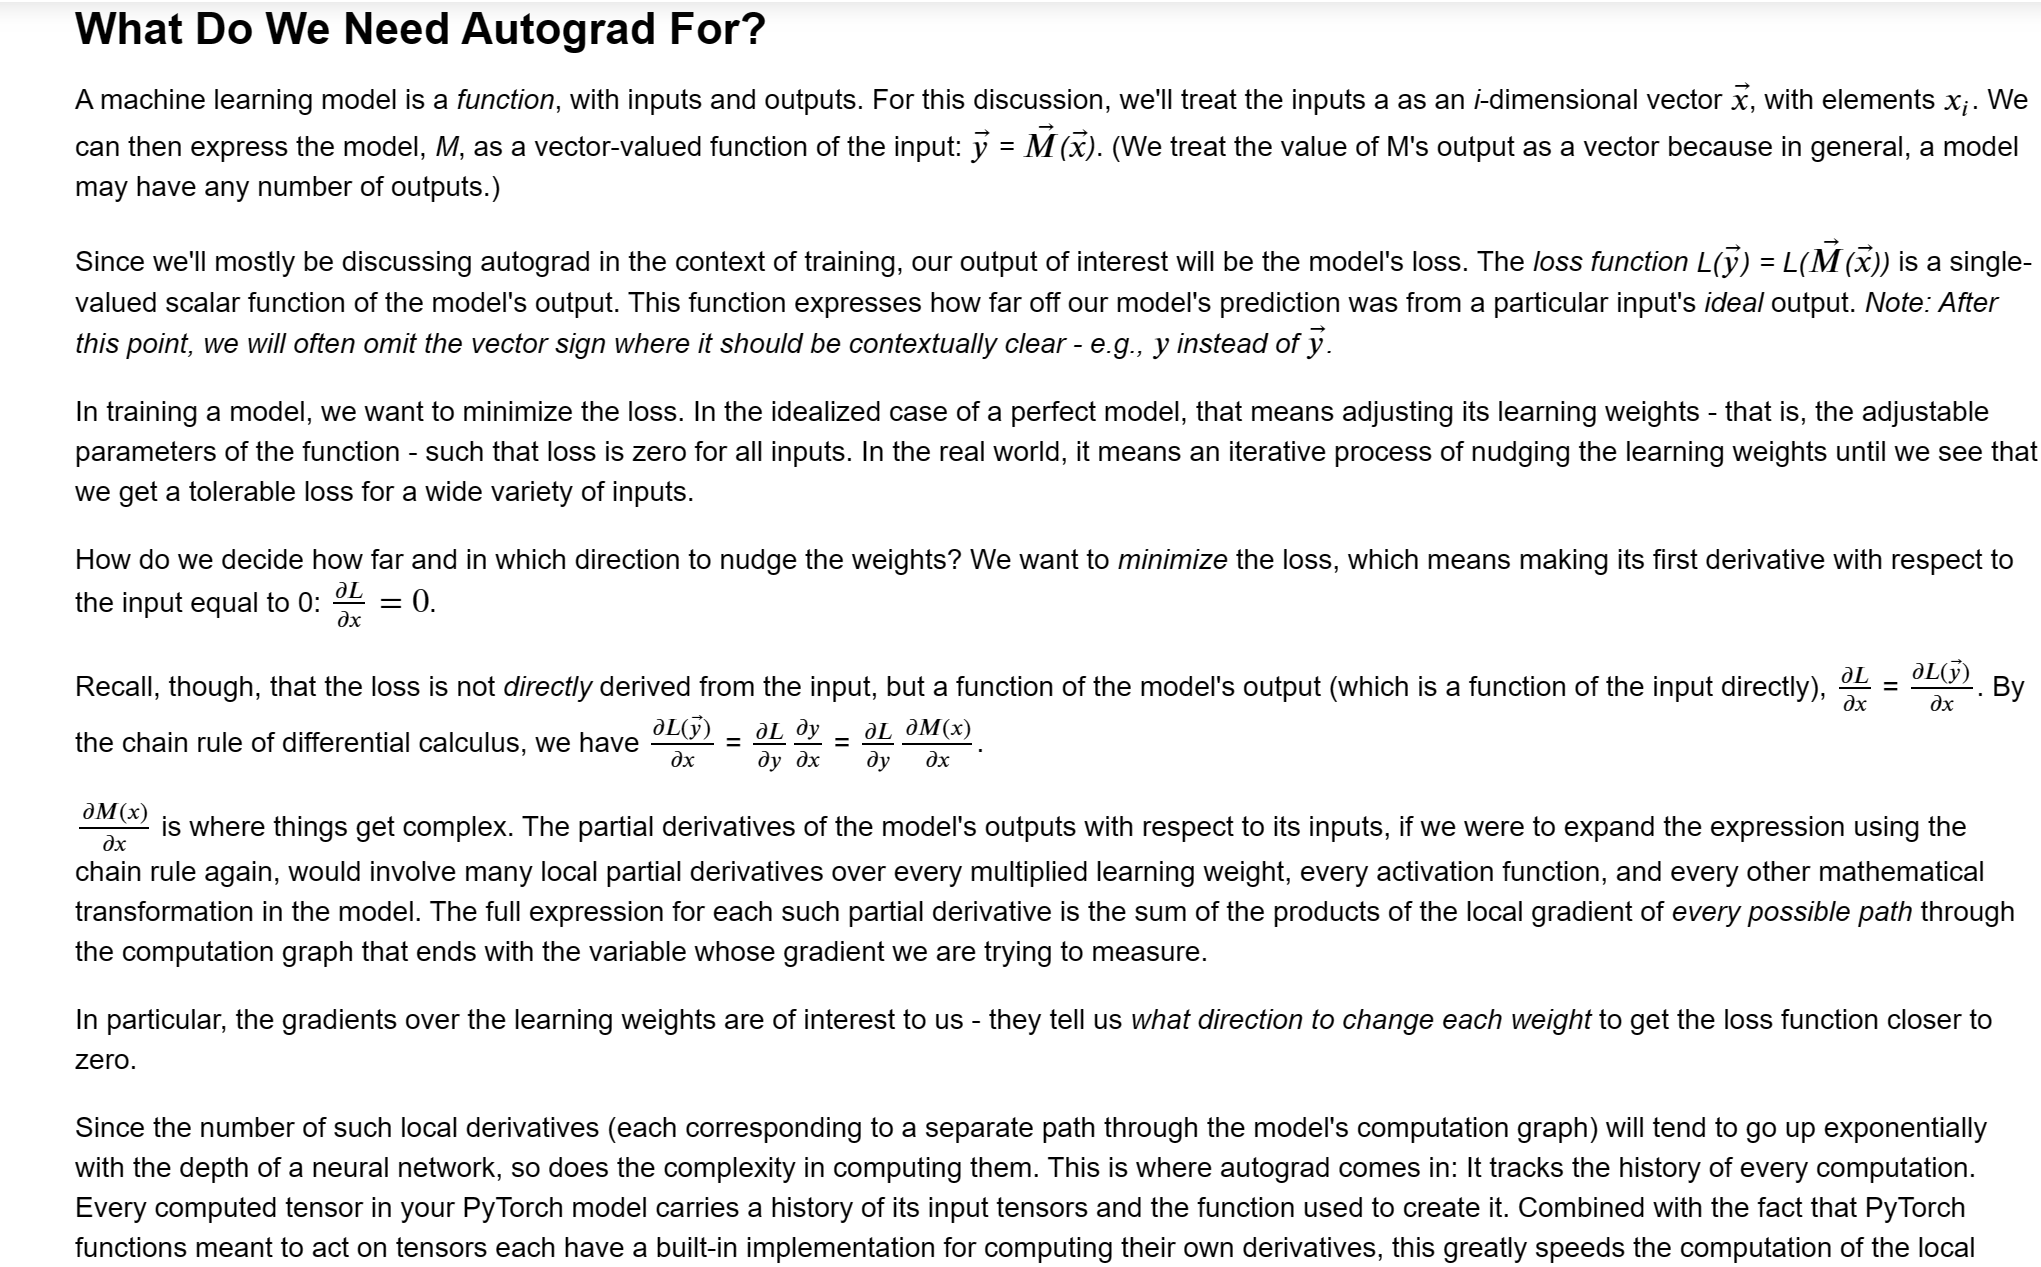

In [ ]:
%matplotlib inline

In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


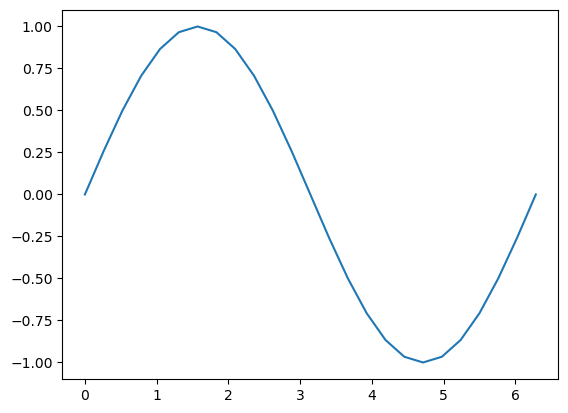

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [4]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


This grad_fn gives us a hint that when we execute the backpropagation step and compute gradients, we'll need to compute the derivative of  𝑠𝑖𝑛(𝑥)
  for all this tensor's inputs.

In [5]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let's compute a single-element output. When you call .backward() on a tensor with no arguments, it expects the calling tensor to contain only a single element, as is the case when computing a loss function.

In [6]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each grad_fn stored with our tensors allows you to walk the computation all the way back to its inputs with its next_functions property. We can see below that drilling down on this property on d shows us the gradient functions for all the prior tensors. Note that a.grad_fn is reported as None, indicating that this was an input to the function with no history of its own.

In [7]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x000001F03948B310>, 0), (None, 0))
((<SinBackward0 object at 0x000001F03948B9A0>, 0), (None, 0))
((<AccumulateGrad object at 0x000001F03948B340>, 0),)
()

c:

b:

a:
None


With all this machinery in place, how do we get derivatives out? You call the backward() method on the output, and check the input's grad property to inspect the gradients:

In [8]:
print(2*torch.cos(a))

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00],
       grad_fn=<MulBackward0>)


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


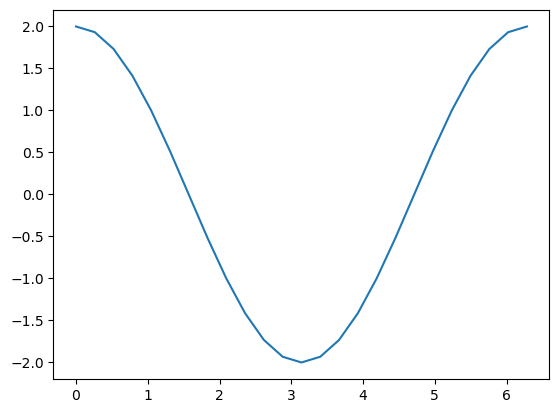

In [9]:
out.backward()

print(a.grad)

plt.plot(a.detach(), a.grad.detach())

In [ ]:
help(out.backward)

Recall the computation steps we took to get here:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()


#### 训练过程中的Autograd

In [11]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

One thing you might notice is that we never specify requires_grad=True for the model's layers. Within a subclass of torch.nn.module, it's assumed that we want to track gradients on the layers' weights for learning.

If we look at the layers of the model, we can examine the values of the weights, and verify that no gradients have been computed yet:

In [12]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0937, -0.0589,  0.0795,  0.0888, -0.0318,  0.0065,  0.0246, -0.0028,
         0.0440,  0.0876], grad_fn=<SliceBackward0>)
None


Let's see how this changes when we run through one training batch. For a loss function, we'll just use the square of the Euclidean distance between our prediction and the ideal_output, and we'll use a basic stochastic gradient descent optimizer.

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(175.3094, grad_fn=<SumBackward0>)


In [14]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0937, -0.0589,  0.0795,  0.0888, -0.0318,  0.0065,  0.0246, -0.0028,
         0.0440,  0.0876], grad_fn=<SliceBackward0>)
tensor([-2.9933, -5.4502, -1.4262, -3.4483, -5.0350, -3.6011,  1.0697, -5.8080,
        -3.8165,  3.0413])


In [15]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0907, -0.0535,  0.0809,  0.0923, -0.0268,  0.0101,  0.0236,  0.0030,
         0.0478,  0.0845], grad_fn=<SliceBackward0>)
tensor([-2.9933, -5.4502, -1.4262, -3.4483, -5.0350, -3.6011,  1.0697, -5.8080,
        -3.8165,  3.0413])


You should see that layer2's weights have changed.

One important thing about the process: After calling optimizer.step(), you need to call optimizer.zero_grad(), or else every time you run loss.backward(), the gradients on the learning weights will accumulate:

In [ ]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

After running the cell above, you should see that after running loss.backward() multiple times, the magnitudes of most of the gradients will be much larger. Failing to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

#### 关闭和开启autograd

There are situations where you will need fine-grained control over whether autograd is enabled. There are multiple ways to do this, depending on the situation.

The simplest is to change the requires_grad flag on a tensor directly:

In [16]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In the cell above, we see that b1 has a grad_fn (i.e., a traced computation history), which is what we expect, since it was derived from a tensor, a, that had autograd turned on. When we turn off autograd explicitly with a.requires_grad = False, computation history is no longer tracked, as we see when we compute b2.

If you only need autograd turned off temporarily, a better way is to use the torch.no_grad():

In [17]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [ ]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

There's a corresponding context manager, torch.enable_grad(), for turning autograd on when it isn't already. It may also be used as a decorator.

Finally, you may have a tensor that requires gradient tracking, but you want a copy that does not. For this we have the Tensor object's detach() method - it creates a copy of the tensor that is detached from the computation history:

In [ ]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

#### 慎用in-place操作

In every example in this notebook so far, we've used variables to capture the intermediate values of a computation. Autograd needs these intermediate values to perform gradient computations. For this reason, you must be careful about using in-place operations when using autograd. Doing so can destroy information you need to compute derivatives in the backward() call. PyTorch will even stop you if you attempt an in-place operation on leaf variable that requires autograd, as shown below.

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

In [ ]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

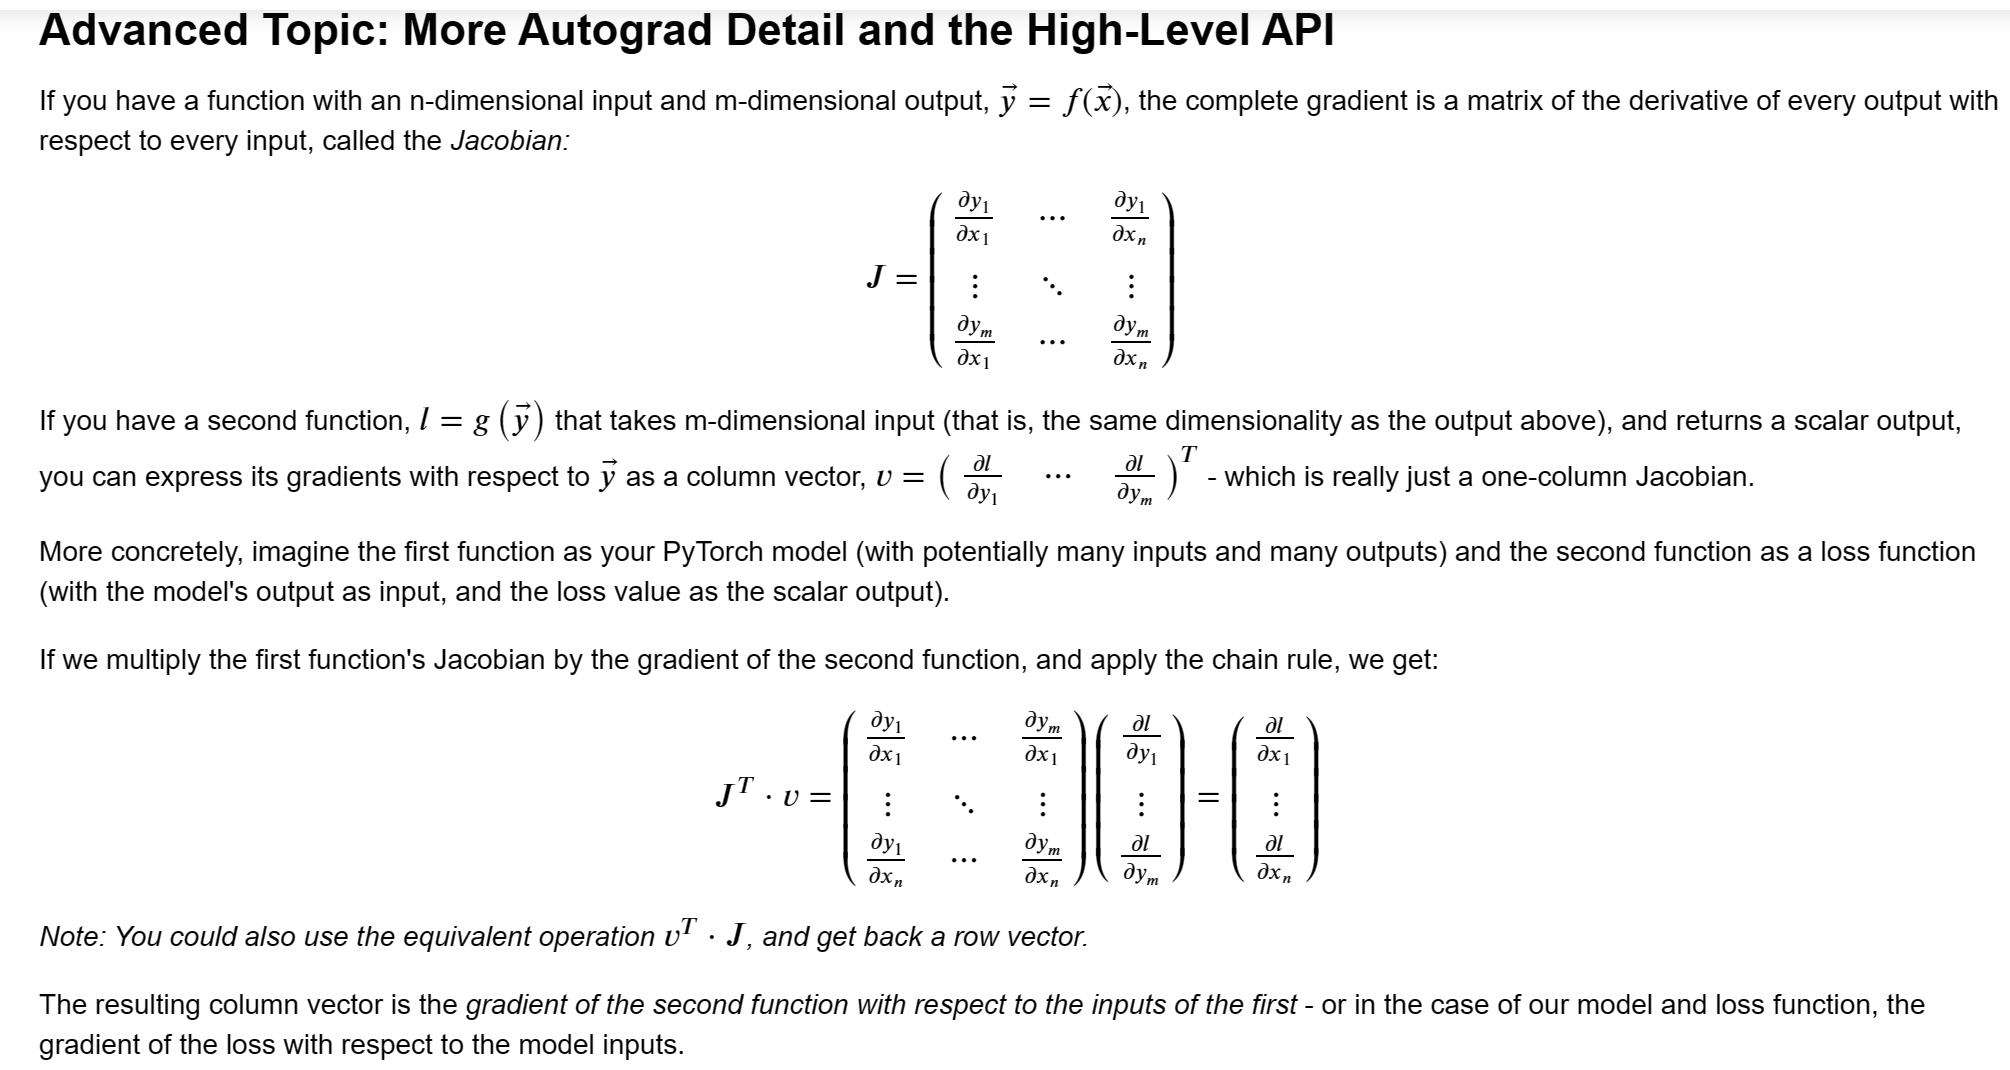

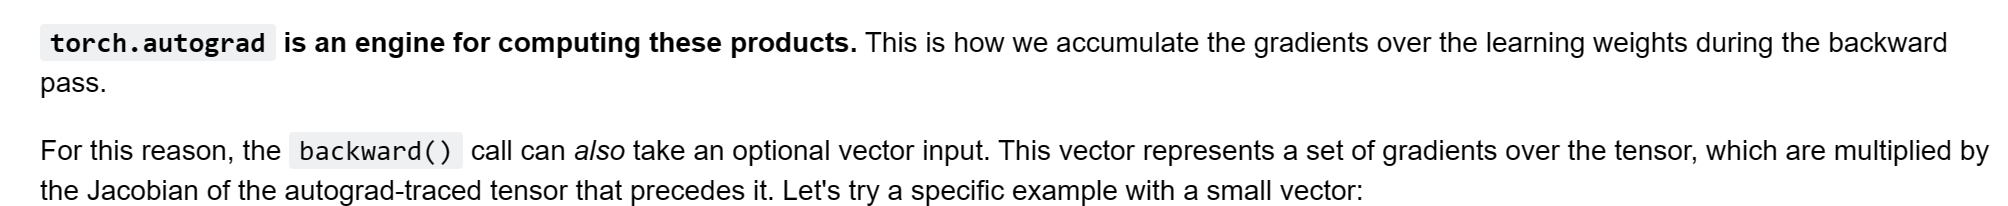

In [ ]:
help(out.backward)

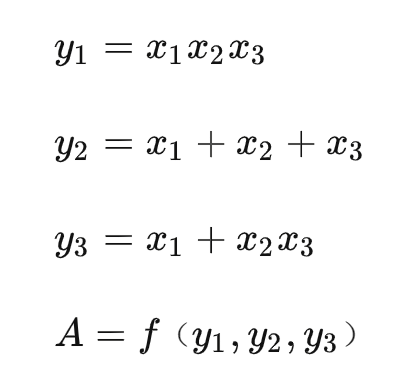

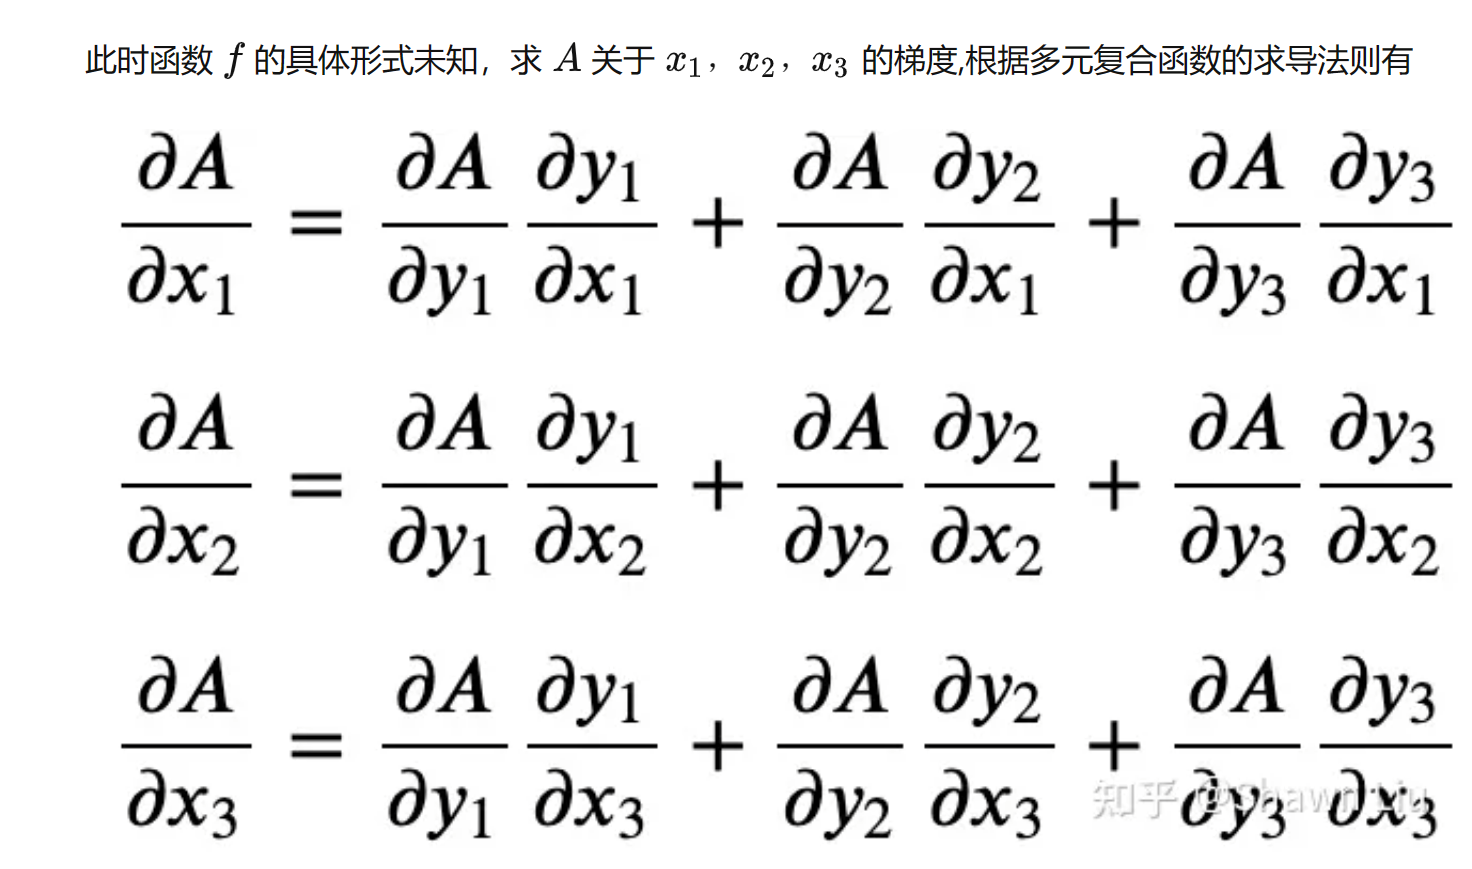

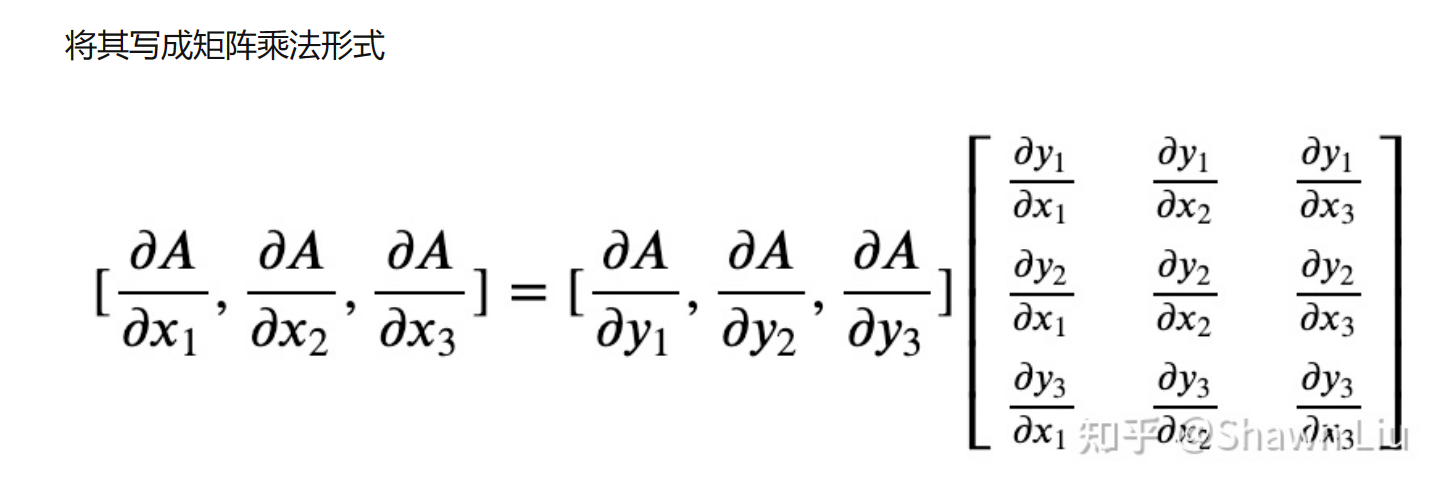

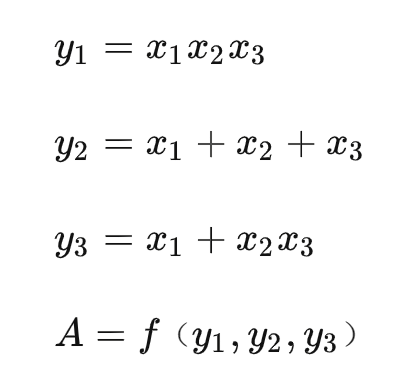

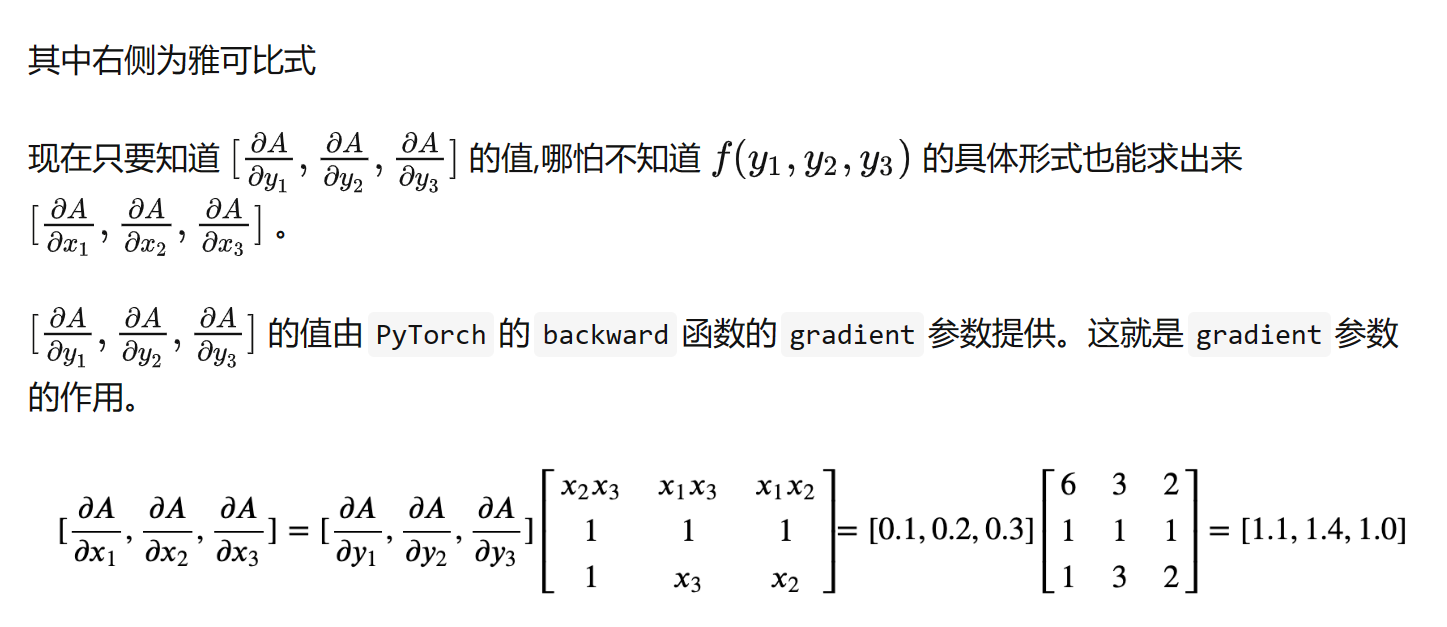

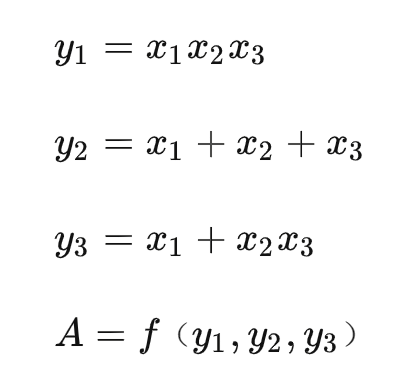

## miaoming_f@cueb.edu.cn 请用“姓名——学号--算法作业周四”

In [1]:
import torch

x1 = torch.tensor(1, requires_grad=True, dtype=torch.float)
x2 = torch.tensor(2, requires_grad=True, dtype=torch.float)
x3 = torch.tensor(3, requires_grad=True, dtype=torch.float)

x = torch.tensor([x1, x2, x3])
y = torch.randn(3)

y[0] = x1 * x2 * x3
y[1] = x1 + x2 + x3
y[2] = x1 + x2 * x3

y.backward(torch.tensor([0.1, 0.2, 0.3], dtype=torch.float))

print(x1.grad, x2.grad, x3.grad)

tensor(1.1000) tensor(1.4000) tensor(1.)


In [2]:
import torch
from torch import autograd
x=torch.tensor(1.)
a=torch.tensor(2.,requires_grad=True)
b=torch.tensor(2.,requires_grad=True)
c=torch.tensor(3.,requires_grad=True)
y=a**2*x+b*x+c
print('before:',a.grad,b.grad,c.grad)
grads=autograd.grad(y,[a,b,c])#分别对a、b、c求偏导
print('after:',grads[0],grads[1],grads[2])

before: None None None
after: tensor(4.) tensor(1.) tensor(1.)
